In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from adjustText import adjust_text
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [34]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2003','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values

In [5]:
country_df=pd.read_csv(r"C:\Users\Yasaman\Downloads\World_bank_GDP_per_capita.csv",skiprows=4)

columns =[country_df.columns[1]]+list(np.arange(2002, 2020, 1).astype(str))   # Convert year numbers to strings if columns are named as strings
selected_df = country_df[columns]  # Select the columns
# Generate the list of column names
average_columns = np.arange(2002, 2020, 1).astype(str)

# Calculate the row-wise average, ignoring NaN values
selected_df['average_gdp_pc'] = selected_df[average_columns].mean(axis=1, skipna=True)



selected_df=selected_df[[country_df.columns[1],'average_gdp_pc']]
#selected_df['Country Code']=selected_df['Country Code'].apply(lambda x:x.lower())



C:\Users\Yasaman\AppData\Local\Temp\ipykernel_52976\2494405923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['average_gdp_pc'] = selected_df[average_columns].mean(axis=1, skipna=True)


In [16]:

Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country for country in Country_list.values()]
c_list=list(Country_list.values())
years=np.arange(2002, 2020, 1)
df=pd.read_csv(r"C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Migration\scopus_2024_V1_scholarlymigration_countryflows_enriched_new.csv")
df=df[df['year'].isin(years)].reset_index(drop=True)

In [28]:
filtered_df=df[(df['iso3codefrom'].isin(abbr))&(df['iso3codefrom']!=df['iso3codeto'])]

before_df=filtered_df[filtered_df['year'].isin(np.arange(2002, 2011, 1))].groupby(by=['iso3codefrom','iso3codeto'])['n_migrations'].sum().reset_index()[['n_migrations','iso3codefrom','iso3codeto']].rename(columns={'n_migrations':'count_before'})
after_df=filtered_df[filtered_df['year'].isin(np.arange(2011, 2020, 1))].groupby(by=['iso3codefrom','iso3codeto'])['n_migrations'].sum().reset_index()[['n_migrations','iso3codefrom','iso3codeto']].rename(columns={'n_migrations':'count_after'})
compare_df=before_df.merge(after_df, how='outer', on=['iso3codefrom','iso3codeto']).fillna(0)
compare_df['count_after']/=9
compare_df['count_before']/=9

compare_df=compare_df.groupby(['iso3codeto'])[['count_before', 'count_after']].sum().reset_index()
compare_df['difference']=compare_df['count_after']-compare_df['count_before']
compare_df=compare_df.sort_values('difference', ascending=False)


In [64]:

country_df=selected_df.merge(compare_df, left_on='Country Code', right_on='iso3codeto', how='left').dropna(subset=['iso3codeto'])
country_df=country_df[country_df['iso3codeto'].isin(possible_countries)]


country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c for c in country_codes['iso3']]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['IRN']='Iran'
map['USA']='USA'
map['GBR']='UK'
map['RUS']='Russia'
map['SYR']='Syria'
map['ARE']='UAE'

map['HKG']='Hong Kong'
plot_a_df=country_df.reset_index(drop=True)

ARE
AUS
AUT
BEL
CAN
CHE
DEU
DNK
FIN
FRA
GBR
HKG
IRL
JPN
KWT
NLD
NOR
QAT
SAU
SGP
SWE
USA
Pearson Correlation Coefficient: 0.16449631050657182
P-value: 0.06352953090730992
Spearman Correlation Coefficient: 0.35206148805762627
P-value: 4.595304832054489e-05


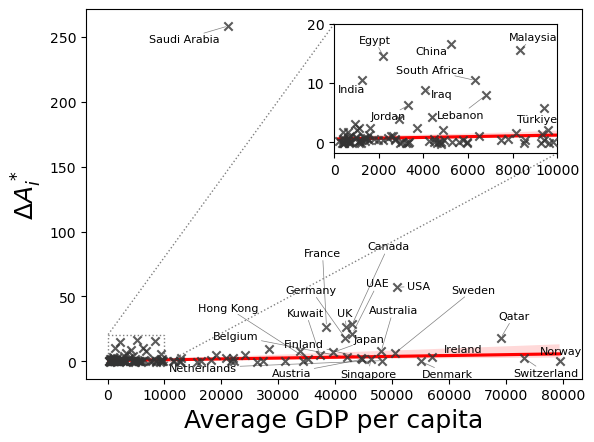

In [67]:
fig, ax1=plt.subplots(nrows=1, ncols=1)
ins = ax1.inset_axes([0.5,0.61,0.45,0.35])


sns.regplot(plot_a_df, x='average_gdp_pc', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ax1,  scatter_kws={"zorder":10}, robust=True)
ax1.set_ylabel(r'$\Delta A_i^*$', fontsize=18)
ax1.set_xlabel('Average GDP per capita', fontsize=18)


sns.regplot(plot_a_df, x='average_gdp_pc', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ins,  scatter_kws={"zorder":10}, robust=True)
ins.set_ylabel(r'', fontsize=10)
ins.set_xlabel(r'', fontsize=10)
ins.set_xlim(0, 10000)
ins.set_ylim(-15/8, 20)


points=[]
# Annotate each point
for line in plot_a_df[(plot_a_df['difference']>50)|(plot_a_df['average_gdp_pc']>35000)].index:

    x = plot_a_df.average_gdp_pc[line]
    y = plot_a_df.difference[line]
    label =map[plot_a_df.iso3codeto[line]]
    print(plot_a_df.iso3codeto[line])
    points+=[ax1.text(x, y, label,
                    fontsize=8, ha='center', va='center')]
    
adjust_text(points, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(1.5, 2.5), ax=ax1)        


points2=[]
# Annotate each point
for line in plot_a_df[(plot_a_df['difference']>5)&(plot_a_df['average_gdp_pc']<10000)].index:

    x = plot_a_df.average_gdp_pc[line]
    y = plot_a_df.difference[line]
    label =map[plot_a_df.iso3codeto[line]]
    points2+=[ins.text(x, y, label,
                    fontsize=8, ha='center', va='center')]
    
adjust_text(points2, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(1.5, 2), ax=ins)        

correlation_coefficient, p_value = pearsonr(plot_a_df['difference'], plot_a_df['average_gdp_pc'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

correlation_coefficient, p_value = stats.spearmanr(plot_a_df['difference'], plot_a_df['average_gdp_pc'])
print("Spearman Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

mark_inset(ax1, ins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle=':')

fig.savefig('migration_vs_gdp.pdf', bbox_inches='tight')